# Dfsu - spectral data

MIKE 21 SW can output full spectral information in points, along lines or in an area. In all these cases data are stored in dfsu files with additional axes: frequency and directions. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mikeio import Dfsu

## Read dfsu point spectrum

In [2]:
fn = "../tests/testdata/pt_spectra.dfsu"

In [3]:
dfs = Dfsu(fn)
dfs

DfsuSpectral0D
Number of elements: None
Number of nodes: None
Projection: LONG/LAT
Number of sigma layers: None
Items:
  0:  Point 1: Energy density <Wave energy density> (meter pow 2 sec per deg)
Time: 31 steps with dt=600.0s
      2017-10-27 00:00:00 -- 2017-10-27 05:00:00

In [4]:
ds = dfs.read(time_steps=0)
spec = np.squeeze(ds[0])

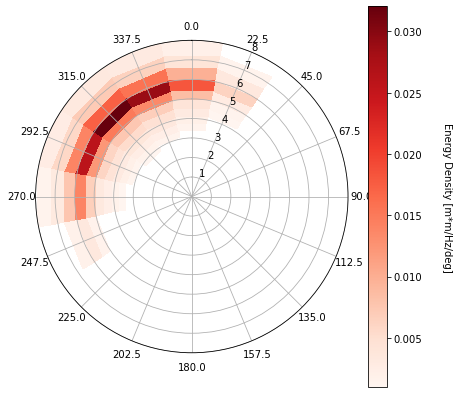

In [5]:
ax = dfs.plot_spectrum(spec, r_as_periods=True, rmax=8, vmin=0.001, plot_type="patch");
#ax.grid(True, which='minor', axis='both', linestyle='-', color='0.8')
#ax.set_xticks(dfs.directions, minor=True);
dird = np.round(dfs.directions*180/np.pi,2)
ax.set_thetagrids(dird,labels=dird);

### Calculate wave parameters from spectrum

and plot as time series

In [6]:
ds = dfs.read()
wp = dfs.calc_wave_parameters_from_spectrum(ds[0], tail=False)
wp._fields

('Hm0', 'T01', 'T02', 'Tm01')

In [7]:
df = pd.DataFrame(np.stack([wp.Hm0, wp.T02]).T, index=ds.time, columns=["Hm0",'T02'])
df.head()

,Hm0,T02
2017-10-27 00:00:00,1.603268,4.765482
2017-10-27 00:10:00,1.633160,4.694426
2017-10-27 00:20:00,1.655875,4.654454
2017-10-27 00:30:00,1.674517,4.631118
2017-10-27 00:40:00,1.690532,4.618044


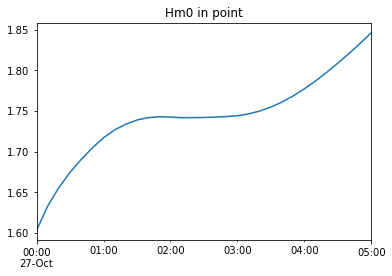

In [8]:
df["Hm0"].plot(title="Hm0 in point");

## Dfsu line spectrum

Data in dfsu line spectra is node-based contrary to must other dfsu-formats.

In [9]:
fn = "../tests/testdata/line_spectra.dfsu"

In [10]:
dfs = Dfsu(fn)
dfs

DfsuSpectral1D
Number of elements: 9
Number of nodes: 10
Projection: LONG/LAT
Number of sigma layers: None
Items:
  0:  Energy density <Wave energy density> (meter pow 2 sec per deg)
Time: 4 steps with dt=6000.0s
      2017-10-27 00:00:00 -- 2017-10-27 05:00:00

In [11]:
ds = dfs.read()  

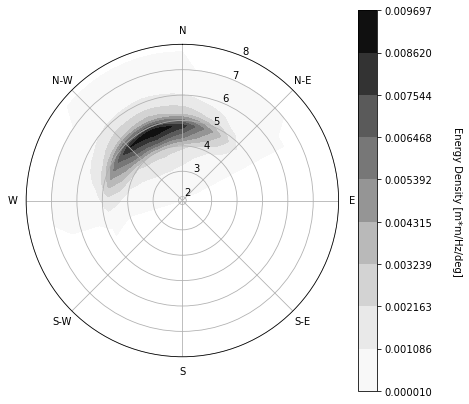

In [12]:
spec = np.squeeze(ds[0][0,3,:,:])  # note first 3 points are outside domain
dfs.plot_spectrum(spec, cmap="Greys", rmax=8, r_as_periods=True);

### Plot Hm0 on a line

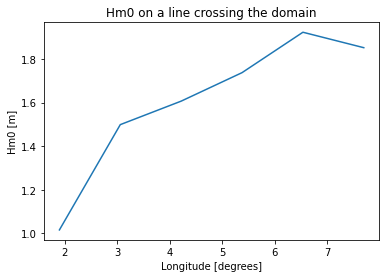

In [13]:
Hm0 = dfs.calc_Hm0_from_spectrum(ds[0])
timestep = 0
plt.plot(dfs.node_coordinates[:,0],Hm0[timestep,:])
plt.title('Hm0 on a line crossing the domain')
plt.xlabel("Longitude [degrees]")
plt.ylabel("Hm0 [m]");

## Dfsu area spectrum

In [14]:
fn = "../tests/testdata/area_spectra.dfsu"

In [15]:
dfs = Dfsu(fn)
dfs

DfsuSpectral2D
Number of elements: 40
Number of nodes: 33
Projection: LONG/LAT
Items:
  0:  Energy density <Wave energy density> (meter pow 2 sec per deg)
Time: 3 steps with dt=9000.0s
      2017-10-27 00:00:00 -- 2017-10-27 05:00:00

In [16]:
ds = dfs.read()

### Plot map of Hm0 calculated from spectrum

In [18]:
Hm0 = dfs.calc_Hm0_from_spectrum(ds[0])
Hm0.shape

(3, 40)

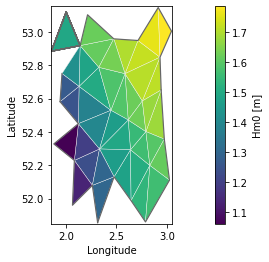

In [19]:
ax = dfs.plot(Hm0[-1,:], label="Hm0 [m]")  # last time step
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude");

### Interactive widget for exploring spectra in different points 

In [20]:
from ipywidgets import interact
from datetime import timedelta

In [21]:
@interact
def plot_element(id=(0,dfs.n_elements-1), step=(0,dfs.n_timesteps-1)):
    spec = np.squeeze(ds[0][step,id])
    time = dfs.start_time + timedelta(seconds=(step*dfs.timestep))
    dfs.plot_spectrum(spec, vmax=0.04, vmin=0, rmax=8, title=f"Wave spectrum, {time}, element: {id}");
    plt.show()

interactive(children=(IntSlider(value=19, description='id', max=39), IntSlider(value=1, description='step', ma…